# CS4168 Project
## Spotify Data Mining
* Cathal Crowe - 21320128
* Robert Flanagan - 21311625
* Mohd Humayun - 21332207
* Steven Lavelle - 21316945
* Oluwadara Fatoki - 21234639

## Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import set_config, manifold, cluster, preprocessing
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.pipeline import Pipeline
from sklearn.cluster  import KMeans
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingClassifier
from sklearn.linear_model import LinearRegression

from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import (
    FunctionTransformer,
    StandardScaler,
    OneHotEncoder
)

from kneed import KneeLocator

from sklearn import manifold, cluster, metrics, neighbors

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn import set_config
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("tracks.csv")

## Exploratory Data Analysis (EDA)

In [2]:
df.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [3]:
df.tail(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


The dataset contains 1500 rows of data with a mix of catgorical and numerical data, with a majority being numerical

In [4]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


In [17]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

 no missing values within the dataset

<Axes: >

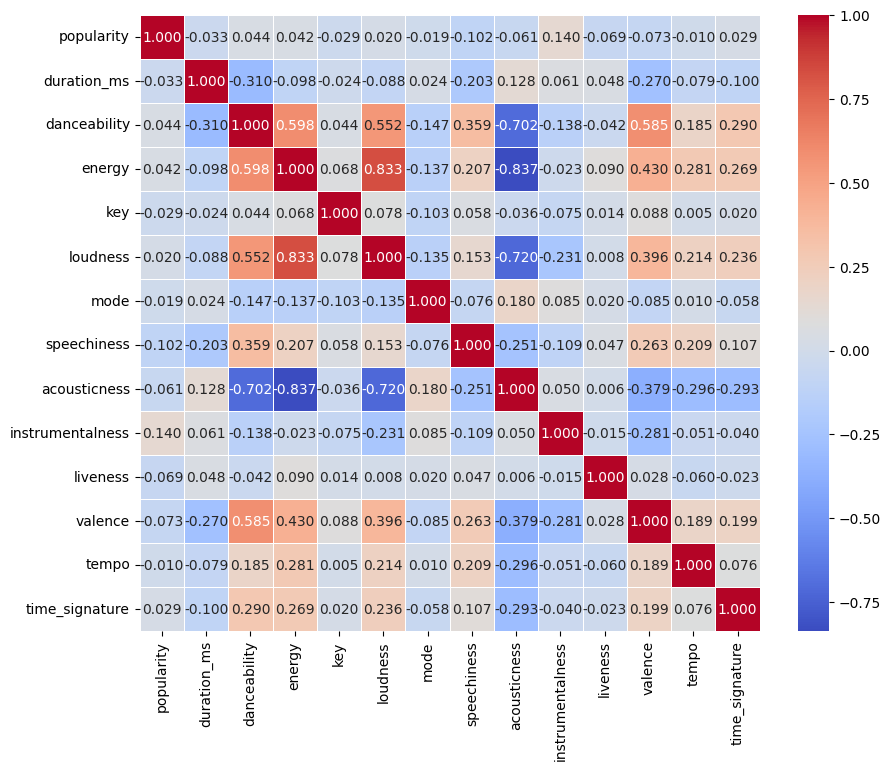

In [ ]:
#Creating a heatmap to visualise the correlation between features
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

there is a healthy mix of correlation between the vlaues, with some of the highest correlation being between `energy` and `danceability`, `energy` and `loudness`, `energy` and `valence` and `danceability` and `loudness`

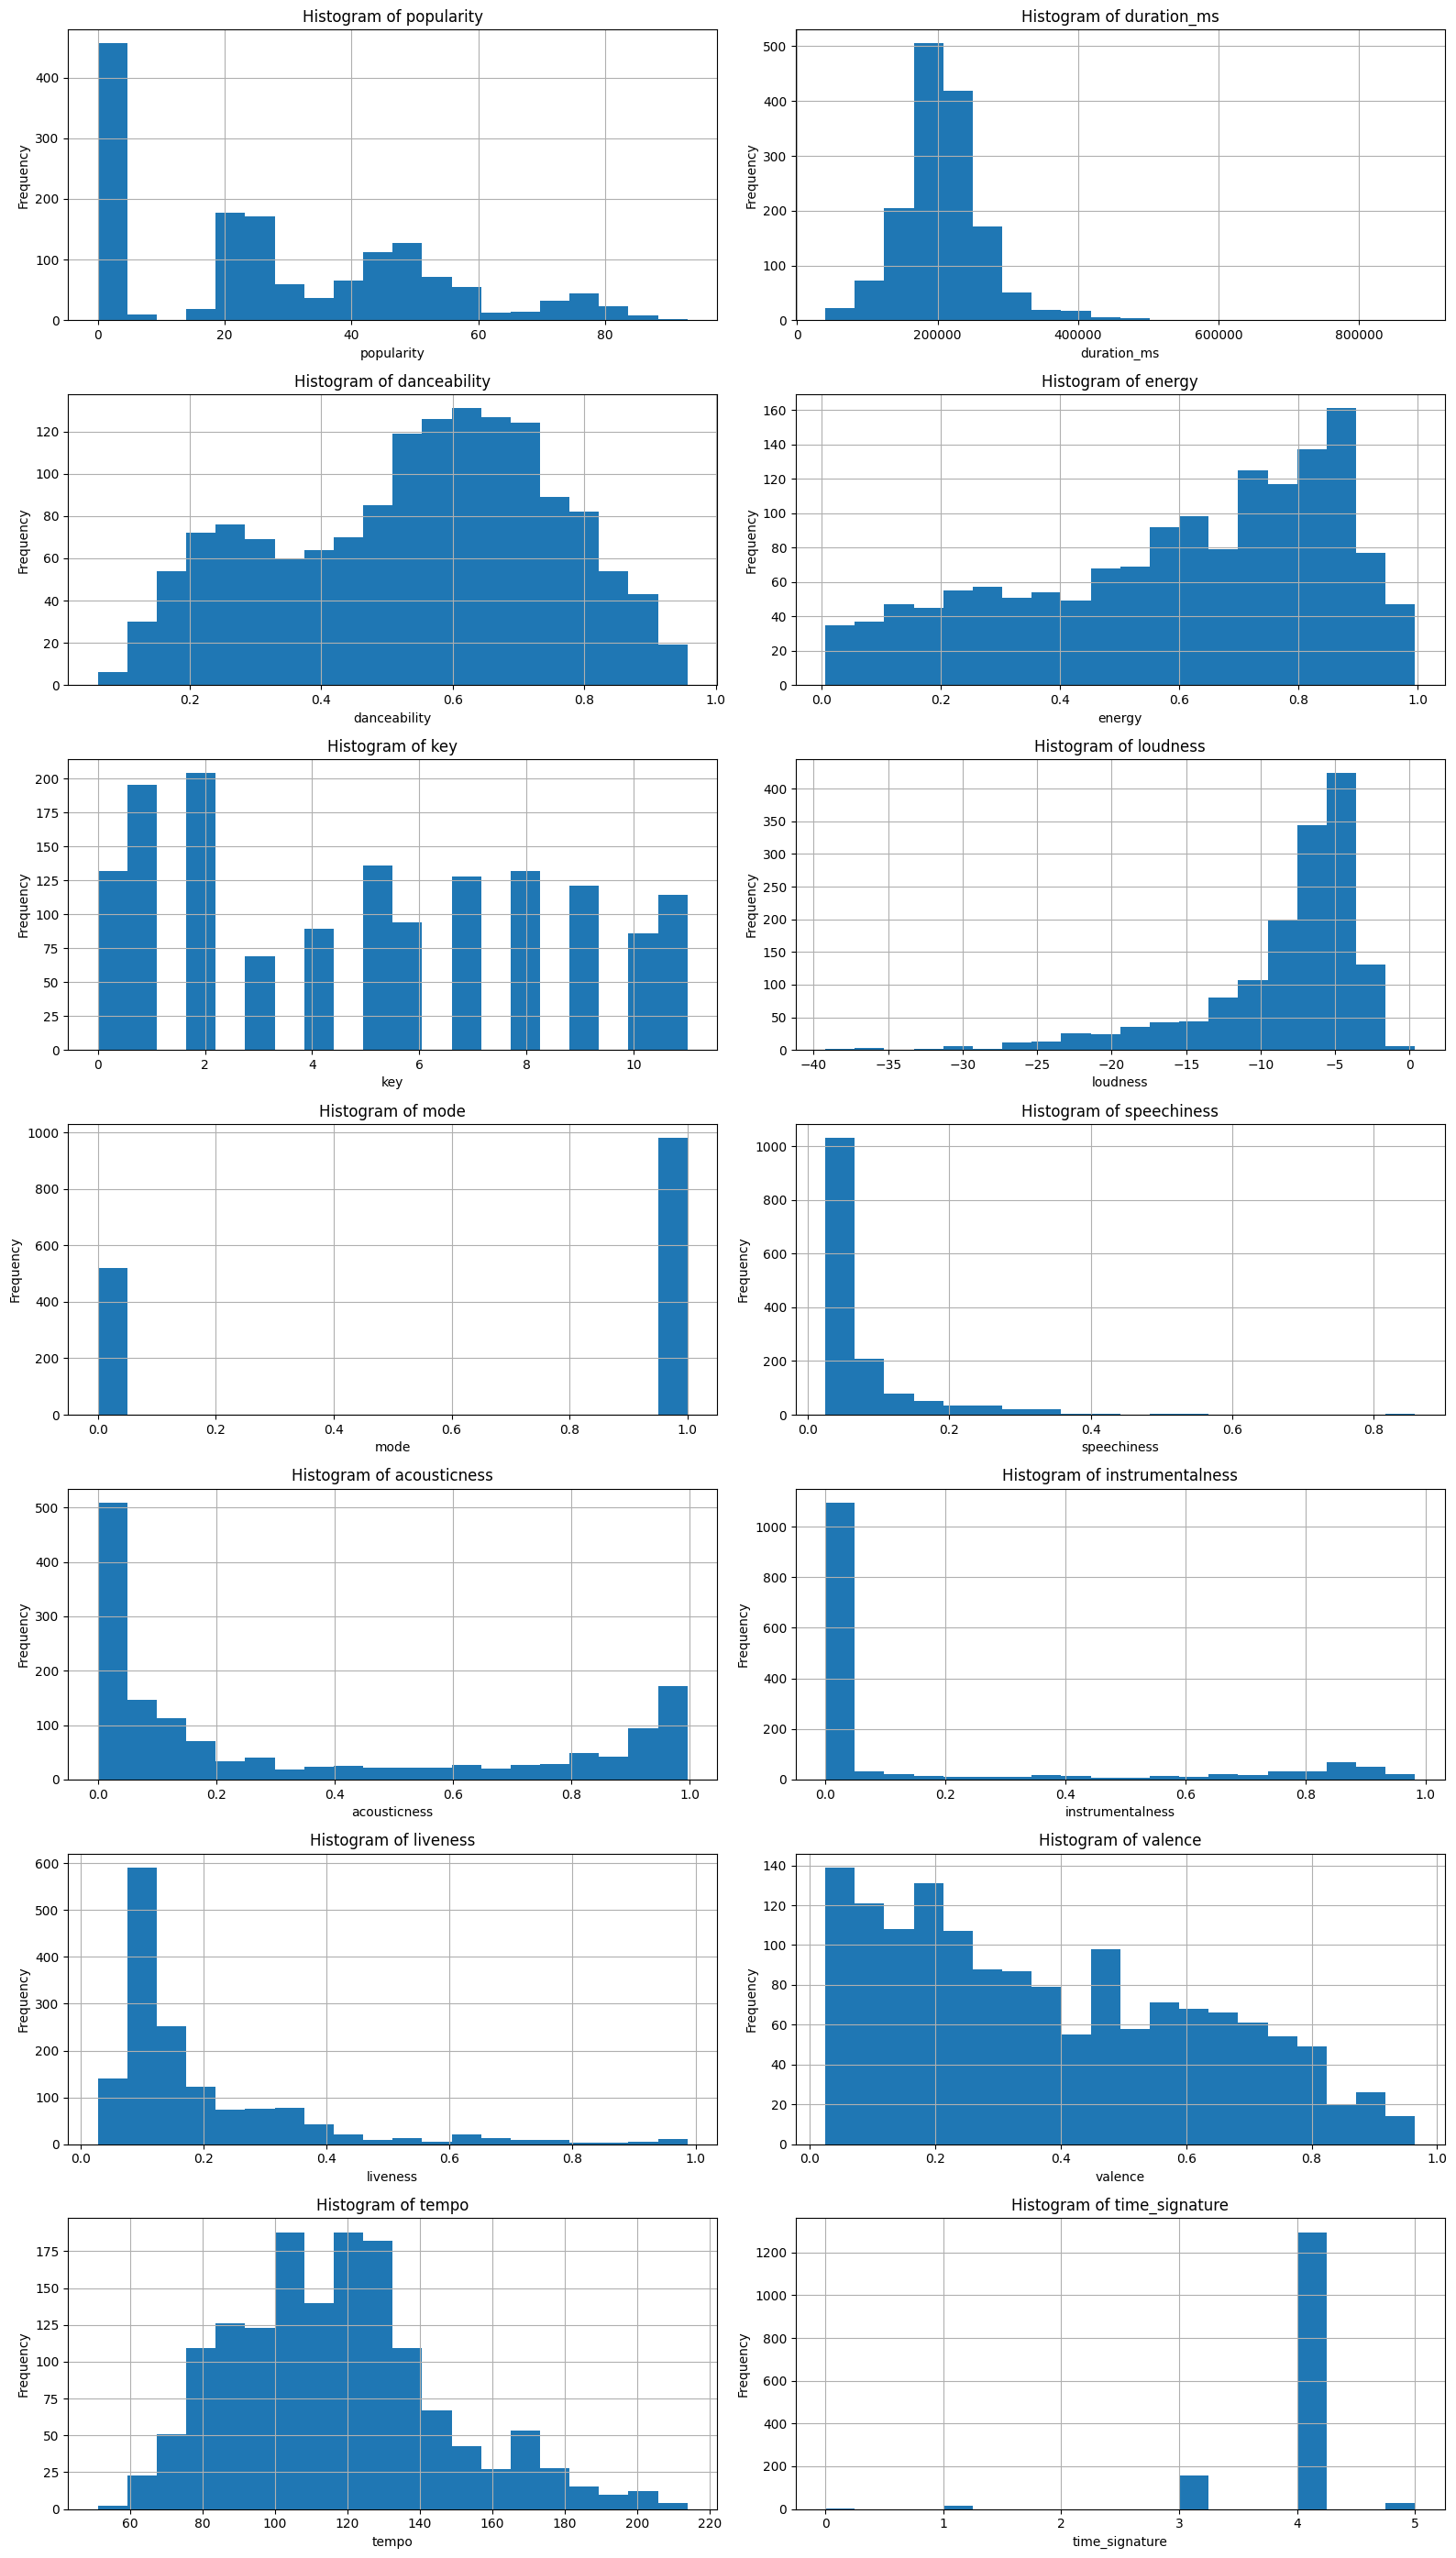

In [ ]:
#Features to plot
features = [
    "popularity", "duration_ms", "danceability", "energy", "key", "loudness",
    "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "time_signature"
]

# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()

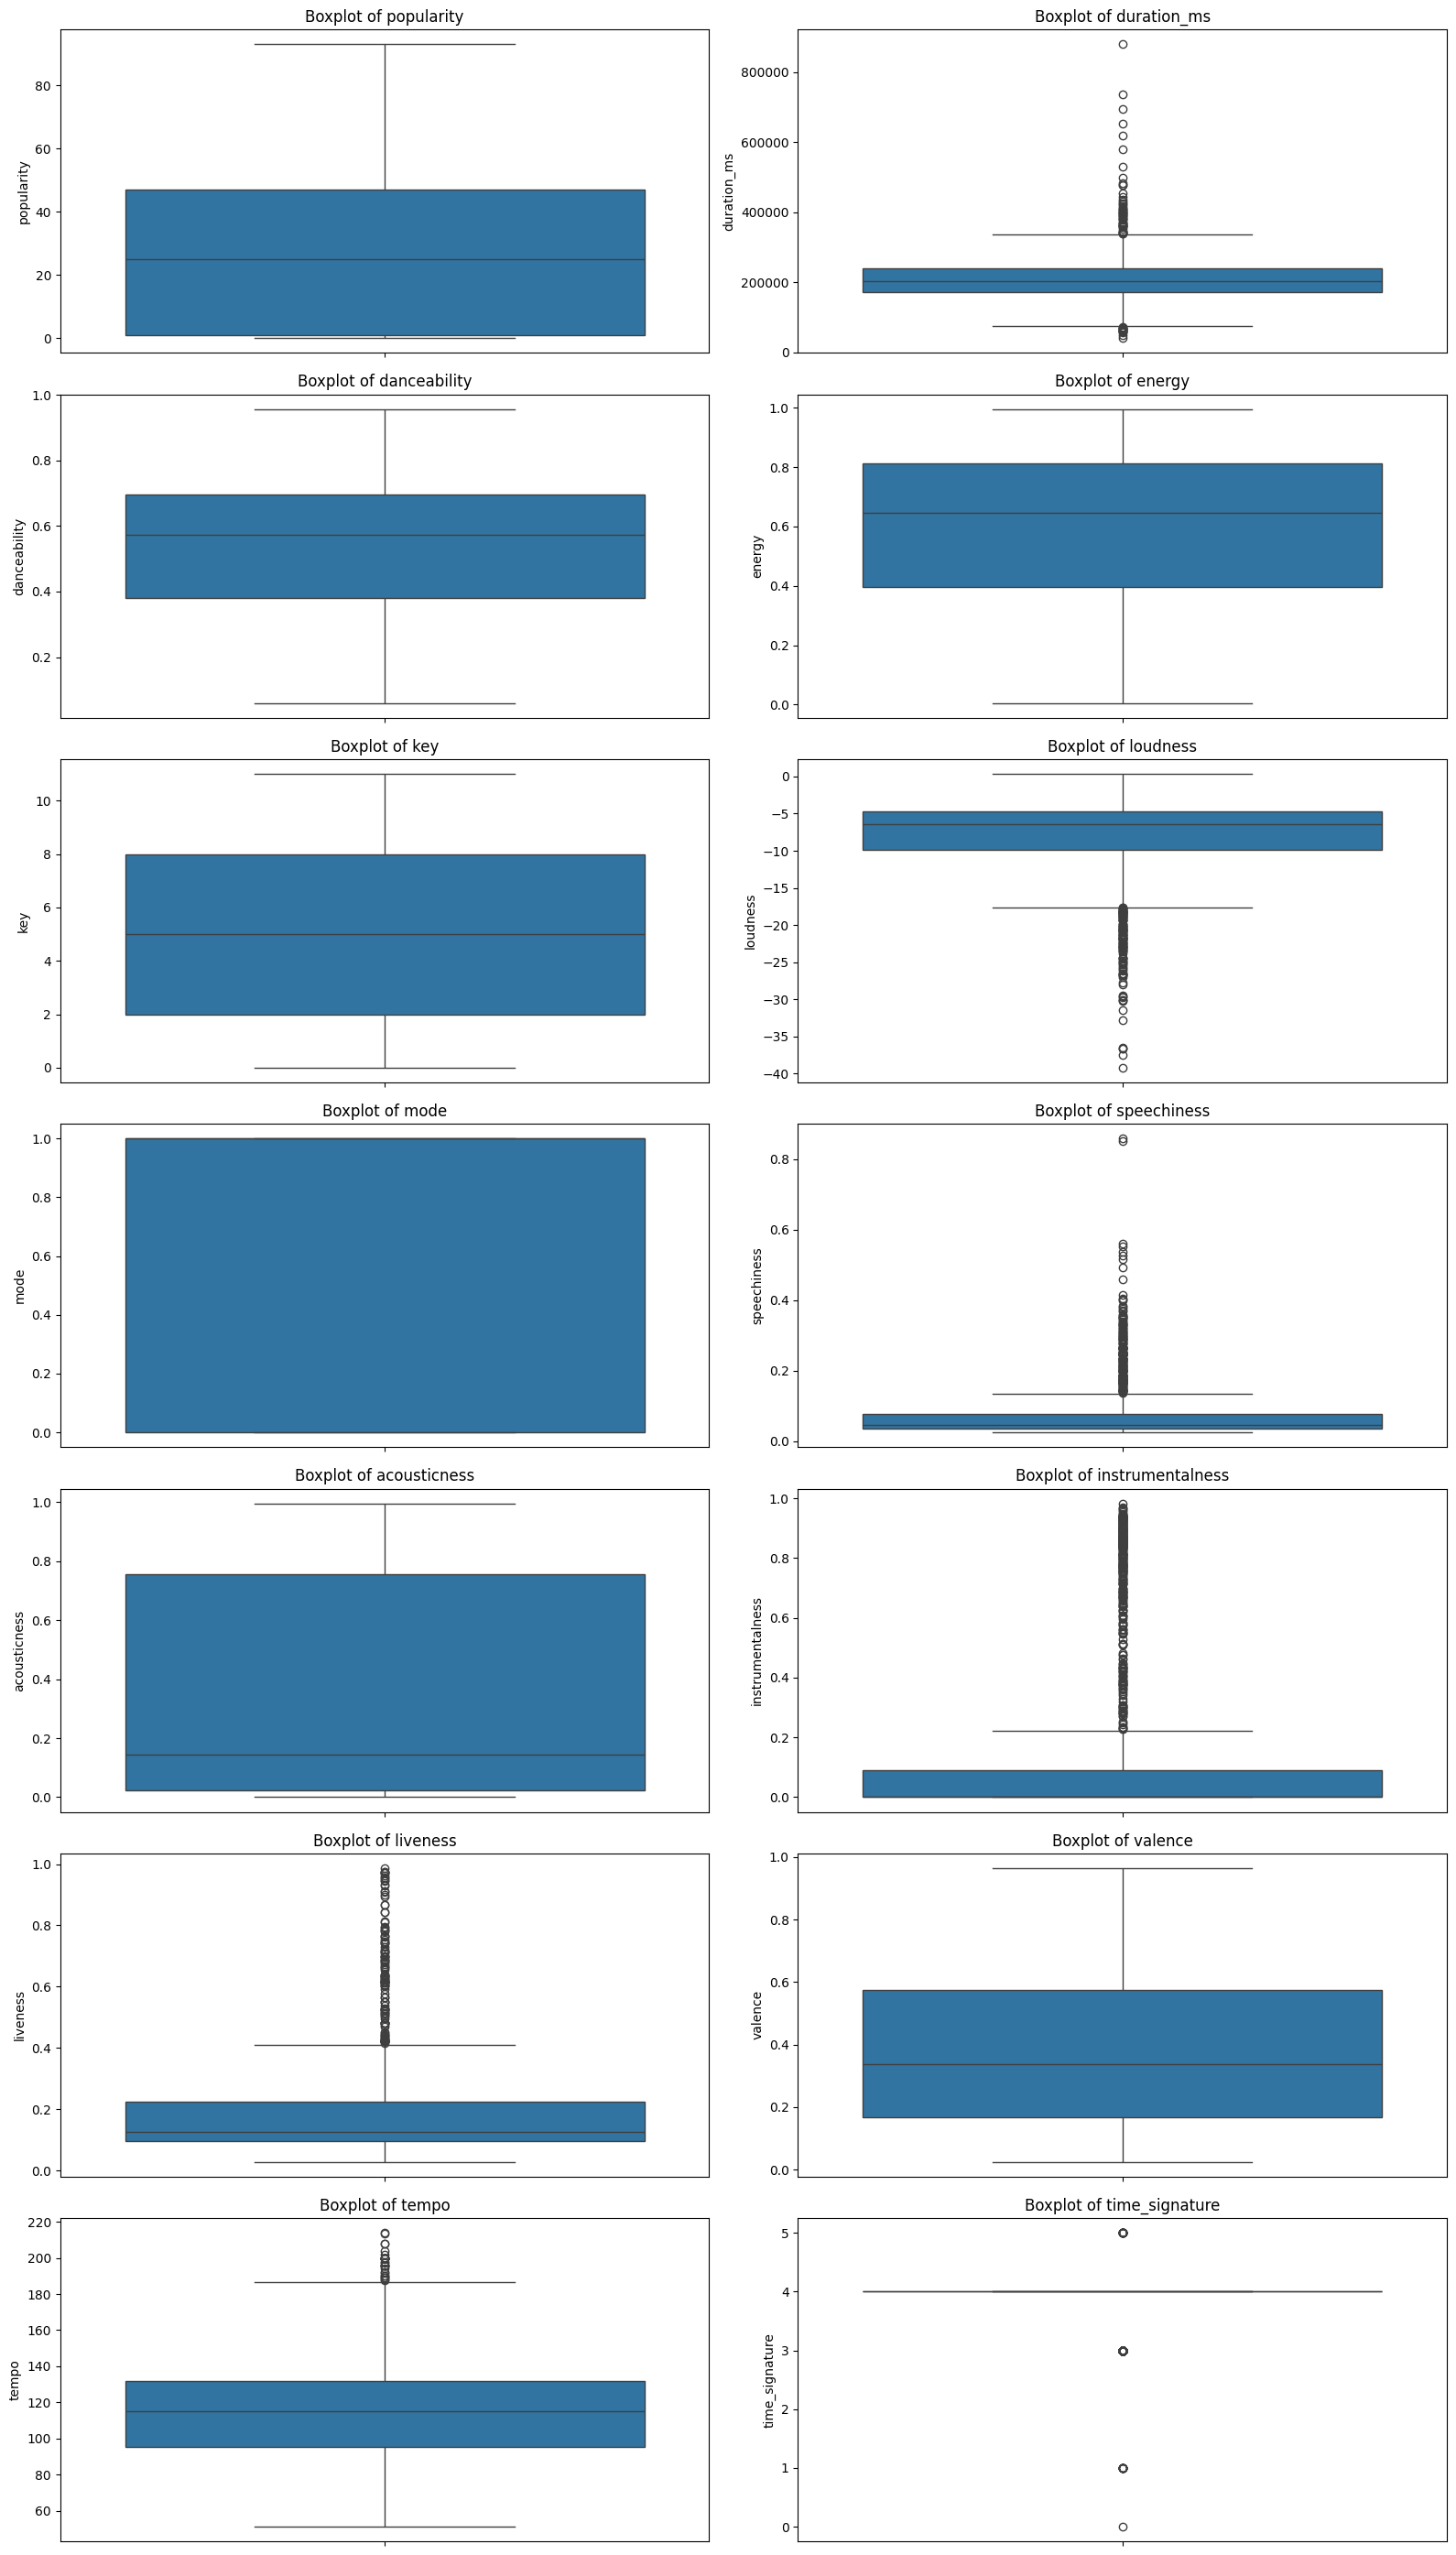

In [ ]:
# Creating the boxplots for the features
num_features = len(features)
num_rows = math.ceil(num_features / 2)

fig = plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(f"Boxplot of {feature}")
    ax.set_xlabel('')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

there are considerable outliers within the fields of `liveliness`,`tempo`, `duration`, `speechiness`,`instrumentalness`

In [8]:
df['track_genre'].value_counts()

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

there is an equal distribution among the gengres within the dataset

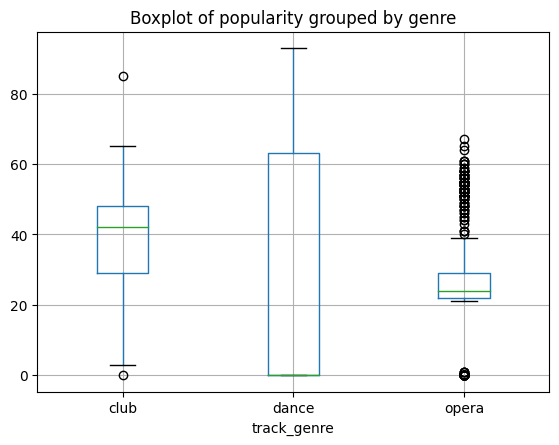

In [9]:
df.boxplot(column='popularity', by='track_genre')
plt.title('Boxplot of popularity grouped by genre')
plt.suptitle("")
plt.show()

There is few outliers in the club genre and overall the club genre has the highest mean popularity. The dance genre has the lowest mean and no outliers as there is a large range of values. The opera genre has lots of outliers, this indicates that most of the opera songs fall in the unpopular range and the mean is dragged up by the popular ones. 

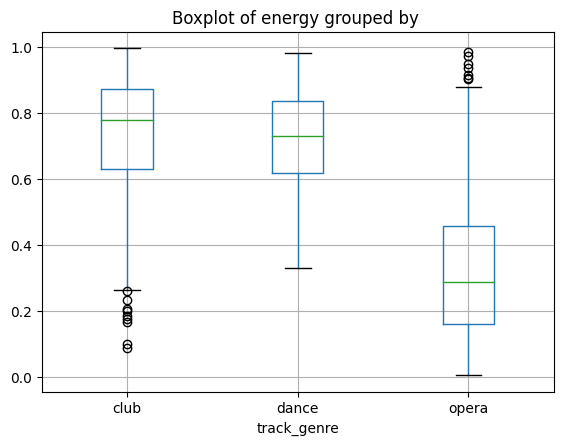

In [10]:
df.boxplot(column='energy', by='track_genre')
plt.title('Boxplot of energy grouped by ')
plt.suptitle("")
plt.show()

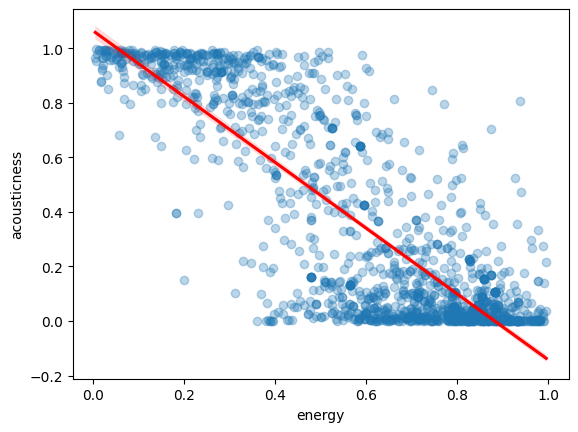

In [11]:
sns.regplot(data=df, x='energy', y='acousticness', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.show()

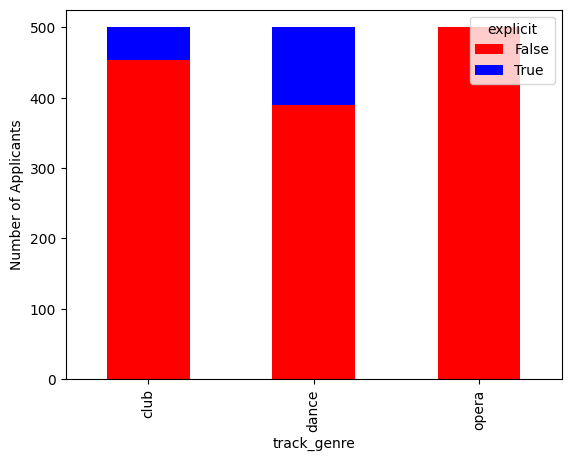

In [12]:
crosstab_CGL = pd.crosstab([ df['track_genre']], df['explicit'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

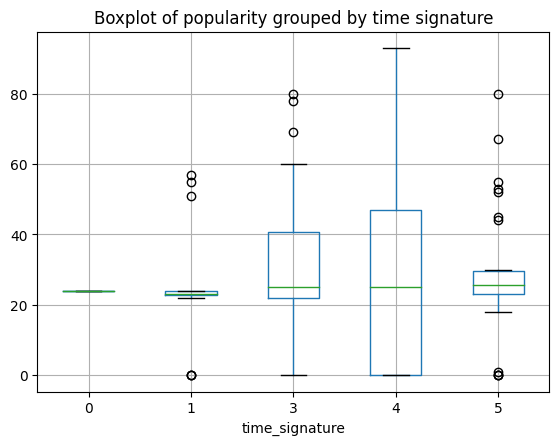

In [13]:
df.boxplot(column='popularity', by='time_signature')
plt.title('Boxplot of popularity grouped by time signature')
plt.suptitle("")
plt.show()

In [14]:
df['time_signature'].value_counts()

time_signature
4    1295
3     158
5      30
1      16
0       1
Name: count, dtype: int64

In [15]:
df['key'].value_counts()

key
2     204
1     195
5     136
0     132
8     132
7     128
9     121
11    114
6      94
4      89
10     86
3      69
Name: count, dtype: int64

In [16]:
df['mode'].value_counts()

mode
1    981
0    519
Name: count, dtype: int64

In [18]:
df.value_counts('track_genre')

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

## Data preparation

Here we create two preprocess pipelines to suit the unique needs of task C (Clustering) and task D (Classification)
We create sub pipelines that allow us to apply different transformations to different types of data ensuring each columnn gets the most appropriate transformation. All of the features get a standard scaler to ensure they are on the same scale.

For clustering we drop the track_genre and add the popularaity column to the simple features sub pipeline. This ensures popularity is on the same scale as all the other features for the clustering anlaysis. We enitially leave popularity out of the sub pipeline because it will be target of the classification models later on and should not be processed in the classification pipeline as a result.

For the classification pipeline we drop popularity. This means we will have to ensure to create the "popularity_binary" column before running the classification pipeline. We also one hot encode track_genre as it is a categorical feature.

In [19]:
# Feature groups divided to allow different transformations 
skewed_feats      = ["duration_ms", "tempo", "liveness",
                     "instrumentalness", "speechiness", "acousticness"]
cube_feats        = ["loudness"]
simple_feats      = ["danceability", "energy", "valence"]
binary_feats      = ["explicit", "mode"]
time_sig_feats    = ["time_signature"]
key_feats         = ["key"]
categorical_feats = ["track_genre"]

# Sub-pipelines for feature groups 

# skewed features: log1p, and then standard scaler
skew_pipe = Pipeline([
    ("log1p" , FunctionTransformer(np.log1p, validate=False)),
    ("scale" , StandardScaler())

# Loudness is cube rooted because of its negative values and the standard scaled
])
cube_pipe = Pipeline([
    ("cuberoot", FunctionTransformer(np.cbrt, validate=False)),
    ("scale"   , StandardScaler())

# Simple features only use standard scaler
])
simple_pipe = Pipeline([
    ("scale" , StandardScaler())
])

# Keep binary features untouched
binary_passthrough = "passthrough"

#  normalize then standard scale time_signature
time_pipe = Pipeline([
    ("norm5" , FunctionTransformer(lambda x: x / 5.0, validate=False)),
    ("scale",  StandardScaler())
])

# → normalize then standard scale key
key_pipe = Pipeline([
    ("norm11", FunctionTransformer(lambda x: x / 11.0, validate=False)),
    ("scale" , StandardScaler())
])

# Clustering pipeline which also processes poplarity and drops genre
preprocessor_clust = ColumnTransformer(
    transformers=[
        ("skewed"      , skew_pipe          , skewed_feats),
        ("cube"        , cube_pipe          , cube_feats),
        ("simple"      , simple_pipe        , simple_feats + ["popularity"]),
        ("time_sig"    , time_pipe          , time_sig_feats),
        ("key_norm"    , key_pipe           , key_feats),
        ("binary"      , binary_passthrough , binary_feats),
        ("drop_genre"  , "drop"             , categorical_feats)
    ],
    remainder="drop",
    verbose_feature_names_out=True
)

# Classification pipeline one hot encodes genre and drops popularity
preprocessor_clf = ColumnTransformer(
    transformers=[
        ("skewed"          , skew_pipe          , skewed_feats),
        ("cube"            , cube_pipe          , cube_feats),
        ("simple"          , simple_pipe        , simple_feats),
        ("time_sig"        , time_pipe          , time_sig_feats),
        ("key_norm"        , key_pipe           , key_feats),
        ("genre_ohe"       , OneHotEncoder(handle_unknown="ignore"),
                                                  categorical_feats),
        ("binary"          , binary_passthrough , binary_feats),
        ("drop_popularity" , "drop"             , ["popularity"])
    ],
    remainder="drop",
    verbose_feature_names_out=True
)


The next two code cells create copys of the dataset and pass them through the clustering and classification pipelines. This lets us quickly see the processed data to ensure that it is all on the correct scale and there isnt anything we overlooked

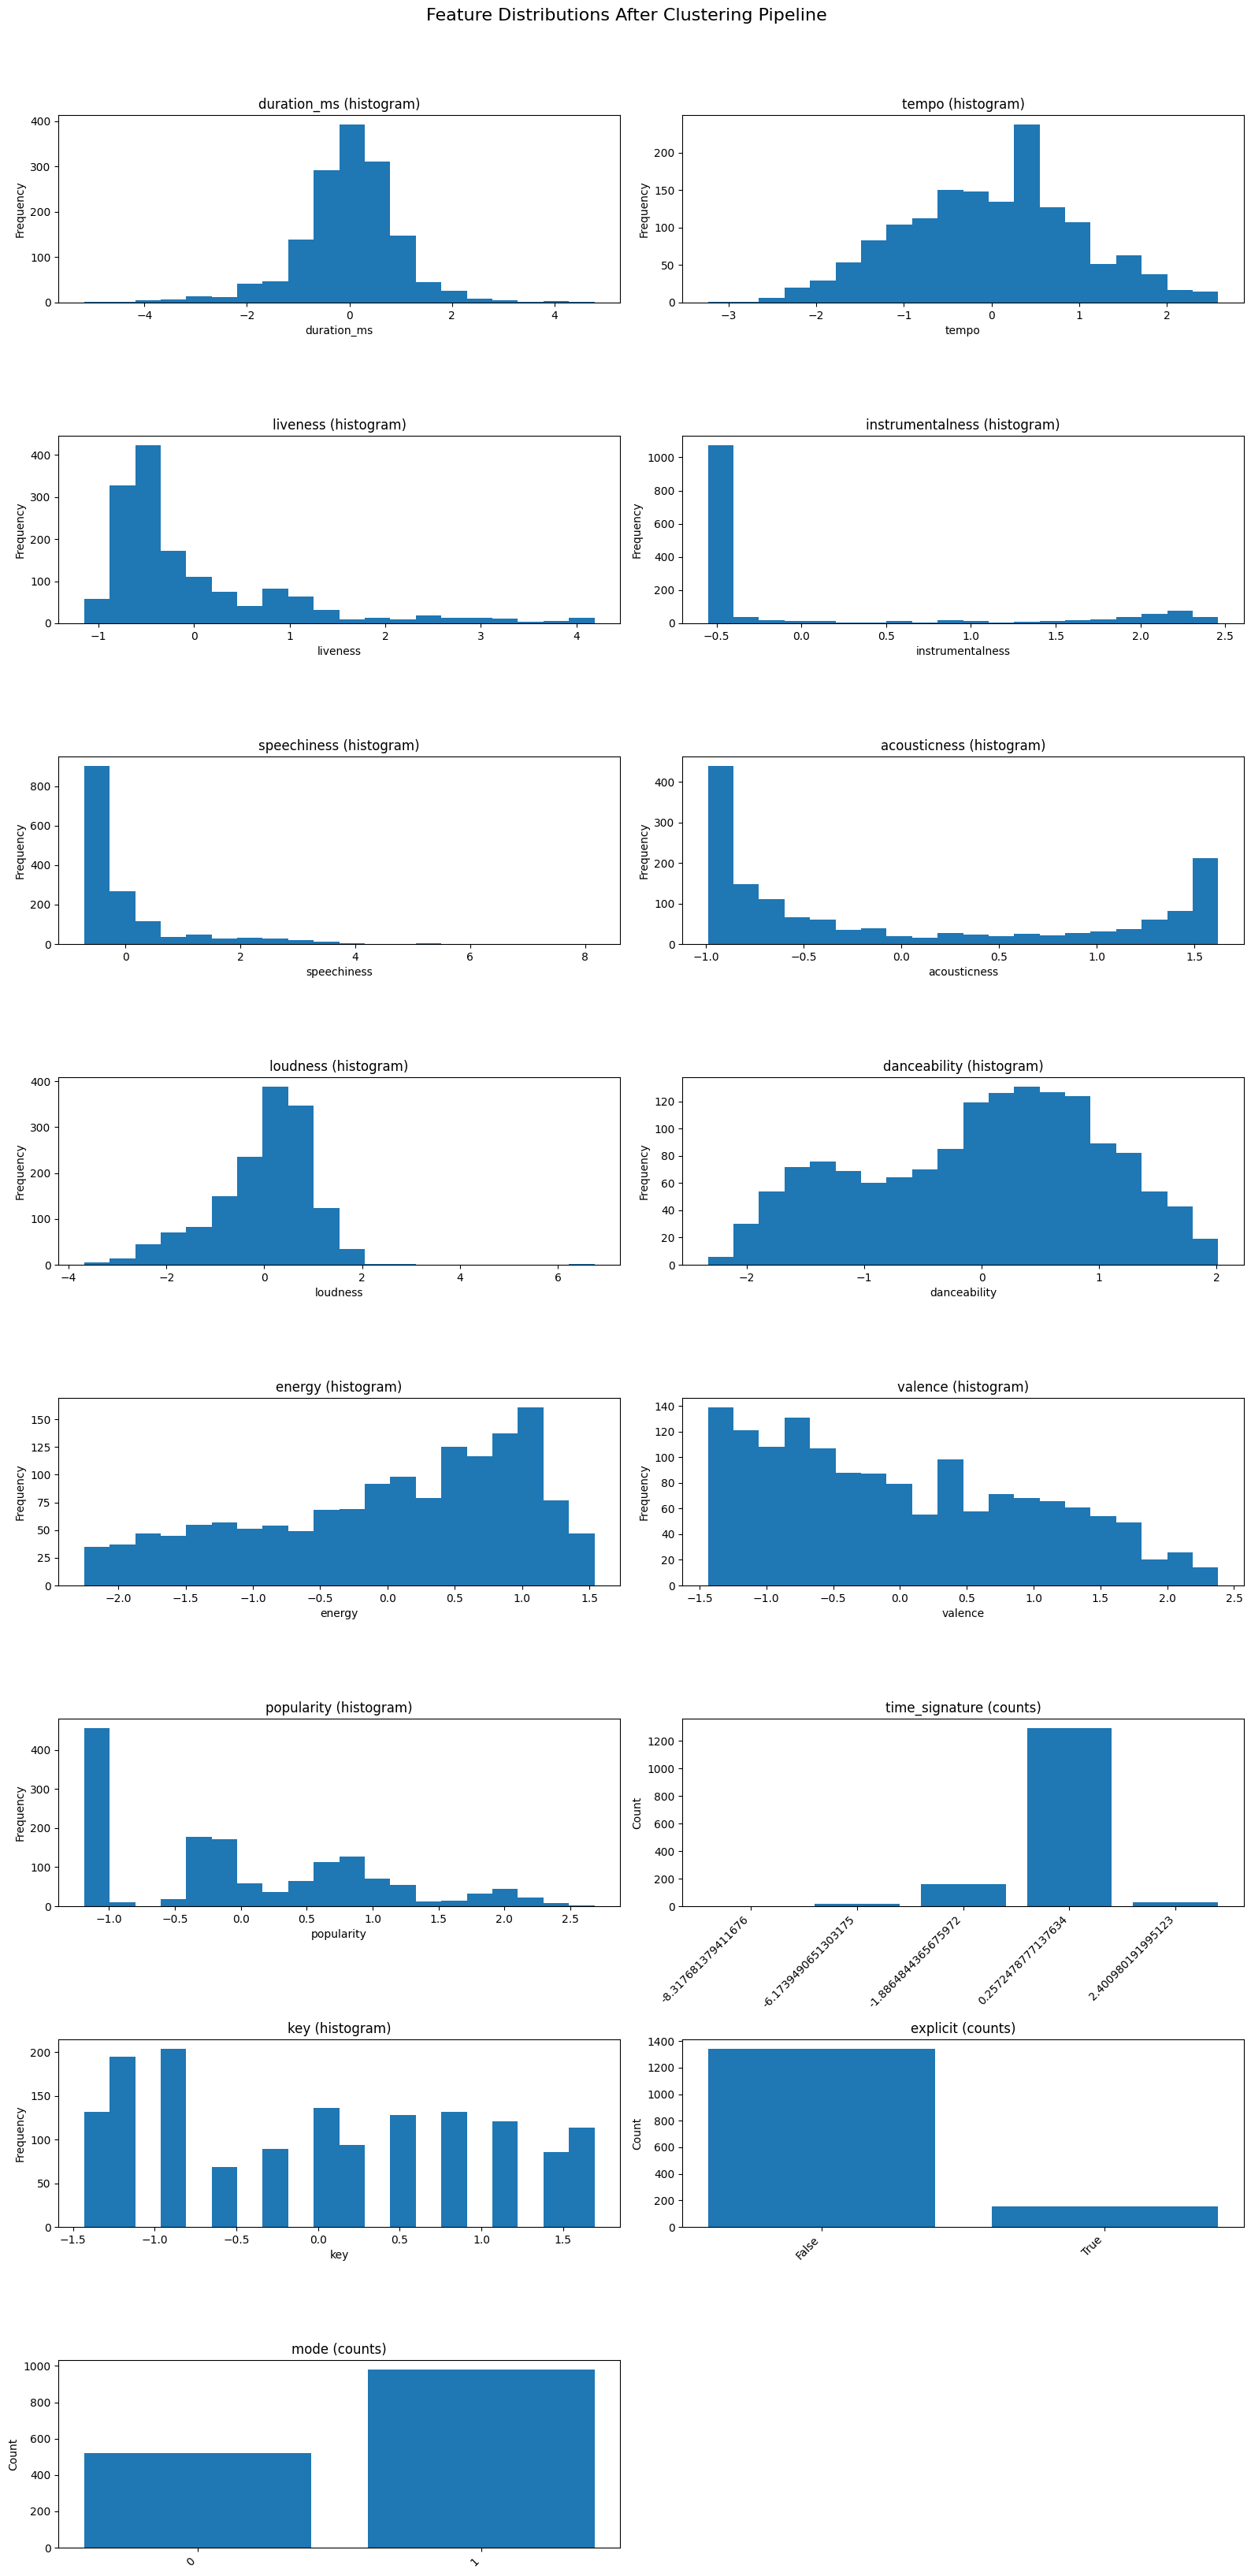

In [20]:
# Draws graph to visualize the data after the clustering pipeline is applied 
df_clust = df.copy()

X_clust = preprocessor_clust.fit_transform(df_clust)

features_clust = (
    skewed_feats
  + cube_feats
  + simple_feats + ["popularity"]
  + time_sig_feats
  + key_feats
  + binary_feats
)


df_clust = pd.DataFrame(X_clust, columns=features_clust)


n_feats = len(features_clust)
n_rows  = math.ceil(n_feats / 2)
fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, feat in enumerate(features_clust):
    ax  = axes[i]
    ser = df_clust[feat]

    if ser.nunique() <= 5:
        vc = ser.value_counts().sort_index()
        x  = np.arange(len(vc))
        ax.bar(x, vc.values)
        ax.set_xticks(x)
        ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")
        ax.set_title(f"{feat} (counts)")
        ax.set_ylabel("Count")
    else:
        ax.hist(ser, bins=20)
        ax.set_title(f"{feat} (histogram)")
        ax.set_xlabel(feat)
        ax.set_ylabel("Frequency")


for ax in axes[n_feats:]:
    ax.axis("off")

fig.suptitle("Feature Distributions After Clustering Pipeline", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


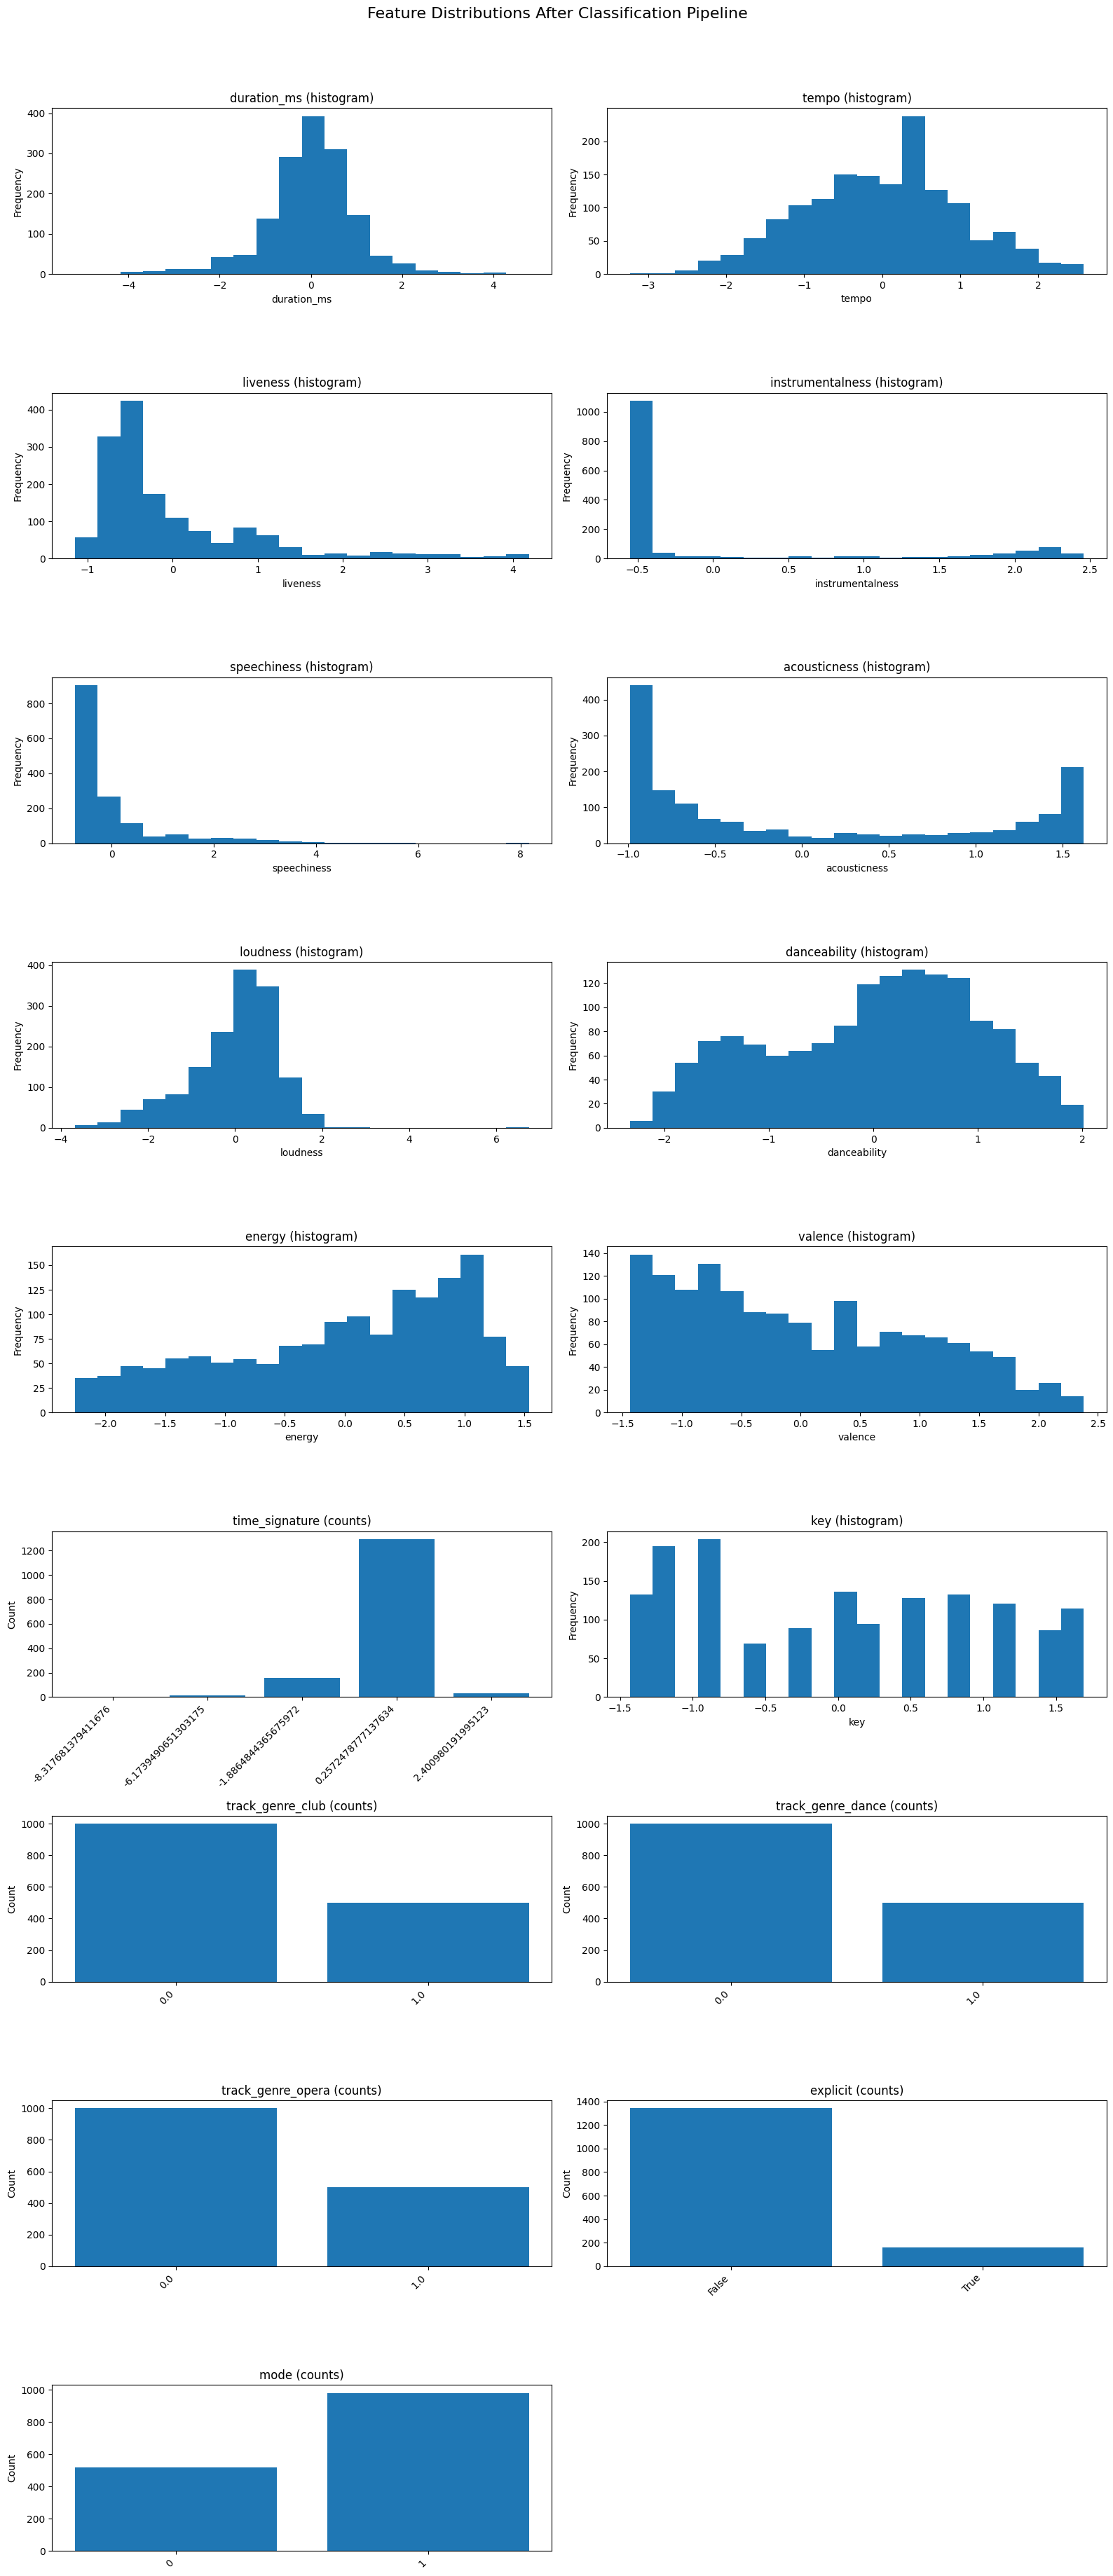

In [21]:
# Draws graph to visualize the data after the clustering pipeline is applied 
df_cls = df.copy()

X_clf = preprocessor_clf.fit_transform(df_cls)


ohe = preprocessor_clf.named_transformers_['genre_ohe']
ohe_names = list(ohe.get_feature_names_out(categorical_feats))


features_clf = (
    skewed_feats
  + cube_feats
  + simple_feats
  + time_sig_feats
  + key_feats
  + ohe_names
  + binary_feats
)


df_clf = pd.DataFrame(X_clf, columns=features_clf)


n_feats = len(features_clf)
n_rows  = math.ceil(n_feats / 2)
fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, feat in enumerate(features_clf):
    ax  = axes[i]
    ser = df_clf[feat]

    if ser.nunique() <= 5:
        vc = ser.value_counts().sort_index()
        x  = np.arange(len(vc))
        ax.bar(x, vc.values)
        ax.set_xticks(x)
        ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")
        ax.set_title(f"{feat} (counts)")
        ax.set_ylabel("Count")
    else:
        ax.hist(ser, bins=20)
        ax.set_title(f"{feat} (histogram)")
        ax.set_xlabel(feat)
        ax.set_ylabel("Frequency")


for ax in axes[n_feats:]:
    ax.axis("off")

fig.suptitle("Feature Distributions After Classification Pipeline", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Clustering

In [22]:
# Scatterplot for clustered data
def clustering_scatterplot(points, labels, centers, title):
    n_clusters = np.unique(labels[labels != -1]).size  # Exclude noise (-1) from cluster count
    colors = np.array(["orange", "blue", "lime", "khaki", "pink", "green", "purple"])
    
    # Plot noise points if they exist
    if -1 in labels:
        plt.scatter(points[labels == -1, 0], 
                    points[labels == -1, 1], 
                    c="gray", 
                    label="Noise")
    
    # Plot clusters
    for i in range(n_clusters):
        plt.scatter(points[labels == i, 0], 
                    points[labels == i, 1], 
                    c=colors[i % colors.size], 
                    label=f"Cluster {i}")
    
    # Plot cluster centers if provided
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c="r", marker="*", s=500, label="Centers")
    
    plt.title(title)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

### K-Means Clustering

In [23]:
# number of clusters
k = 3

# build a pipeline: preprocess → k-means
kmeans_pipe = Pipeline([
    ("preprocessor", preprocessor_clust),
    ("kmeans",      KMeans(n_clusters=k, random_state=42))
])

# fit on the original df (no 'cluster' column yet)
kmeans_pipe.fit(df)

# create a new DataFrame with the cluster labels
df_with_clusters = df.assign(
    cluster = kmeans_pipe.named_steps["kmeans"].labels_
)

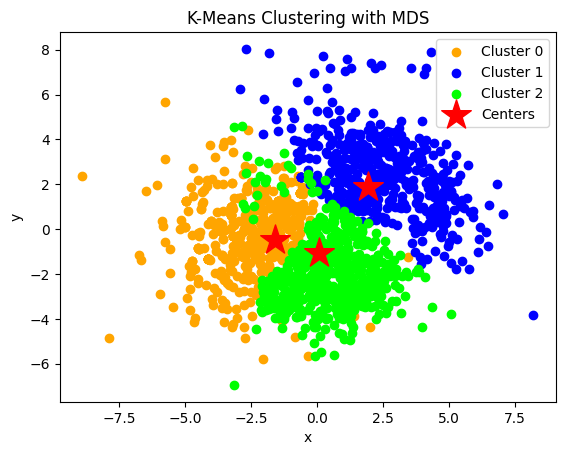

In [24]:
# 1) Preprocess the original df (still no 'cluster' column here!)
X_proc = kmeans_pipe.named_steps["preprocessor"].transform(df)

# 2) Stack with cluster centers (in the same preprocessed space)
centers          = kmeans_pipe.named_steps["kmeans"].cluster_centers_
data_and_centers = np.vstack([X_proc, centers])

# 3) MDS projection
mds_coordinates = manifold.MDS(n_components=2, random_state=42) \
                       .fit_transform(data_and_centers)

# 4) Plot using the labels from df_with_clusters
clustering_scatterplot(
    mds_coordinates[:-k],
    df_with_clusters["cluster"],
    mds_coordinates[-k:],
    "K-Means Clustering with MDS"
)

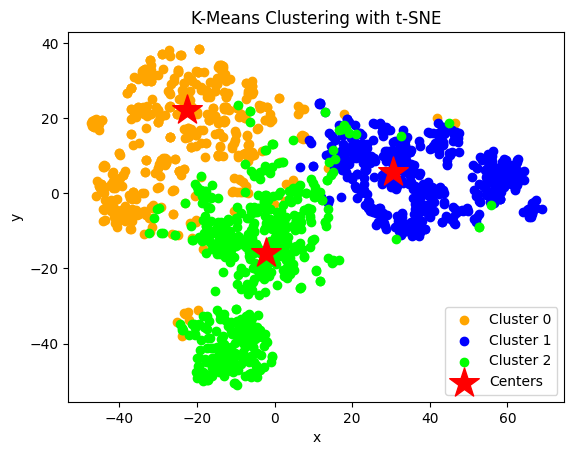

In [25]:
# reuse data_and_centers from Cell 2
tsne_coordinates = manifold.TSNE(n_components=2, random_state=42) \
                         .fit_transform(data_and_centers)

clustering_scatterplot(
    tsne_coordinates[:-k],
    df_with_clusters["cluster"],
    tsne_coordinates[-k:],
    "K-Means Clustering with t-SNE"
)

In [26]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [27]:
df.tail()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


In [28]:
# only numeric features, grouped by cluster
(df_with_clusters
   .select_dtypes(include="number")
   .drop(columns="cluster")              # exclude the label itself
   .groupby(df_with_clusters["cluster"])
   .mean()
)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,
0,9.161793,189073.750487,0.677938,0.734940,5.364522,-5.502357,0.557505,0.127063,0.123199,0.022104,0.212682,0.552108,126.812805,3.994152
1,24.848018,226799.319383,0.304910,0.269047,4.852423,-14.328322,0.784141,0.043205,0.853971,0.204169,0.198391,0.200548,102.811465,3.645374
2,50.375235,215119.431520,0.610492,0.736203,4.896811,-5.891724,0.636023,0.058944,0.133190,0.273680,0.174663,0.363117,119.428463,3.969981


### Elbow Method

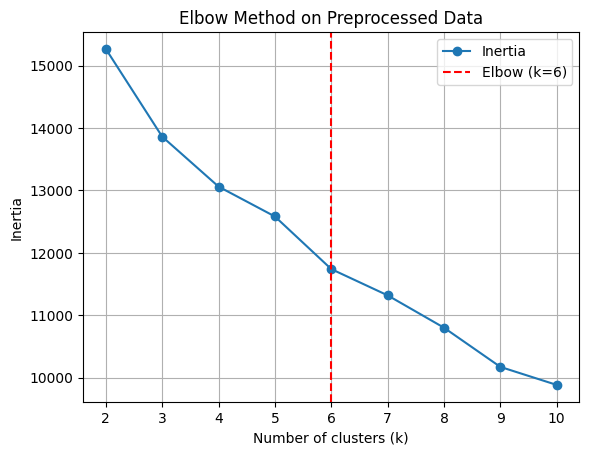

The optimal number of clusters (k) based on elbow point is: 6


In [29]:
# 0) Preprocess once
X_proc = preprocessor_clust.fit_transform(df)

# 1) Compute inertia for k = 2…10
inertia  = []
k_values = range(2, 11)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42).fit(X_proc)
    inertia.append(km.inertia_)

# 2) Locate the elbow
knee = KneeLocator(
    k_values, inertia,
    curve="convex", direction="decreasing"
).knee

# 3) Plot
plt.plot(k_values, inertia, "o-", label="Inertia")
plt.axvline(knee, color="red", linestyle="--", label=f"Elbow (k={knee})")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method on Preprocessed Data")
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of clusters (k) based on elbow point is: {knee}")

### Silhouette Analysis

For n_clusters = 2, avg silhouette = 0.250


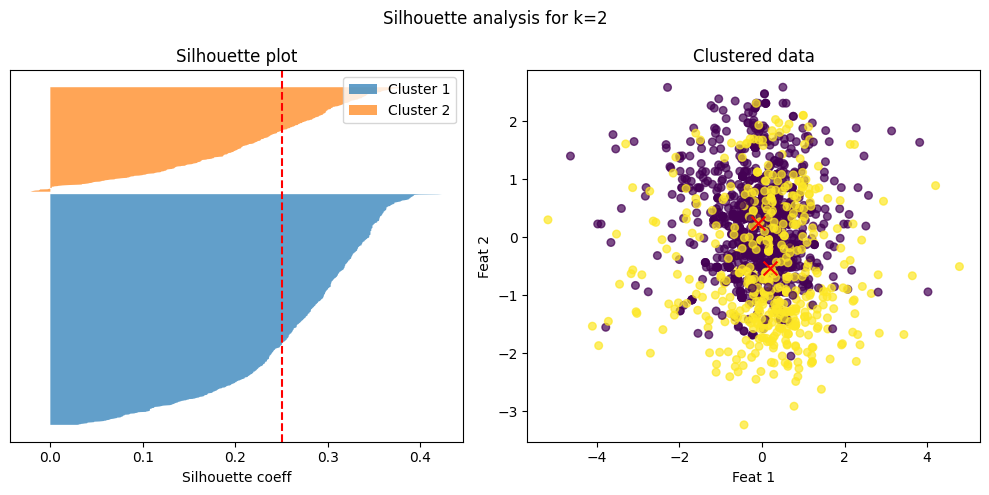

For n_clusters = 3, avg silhouette = 0.157


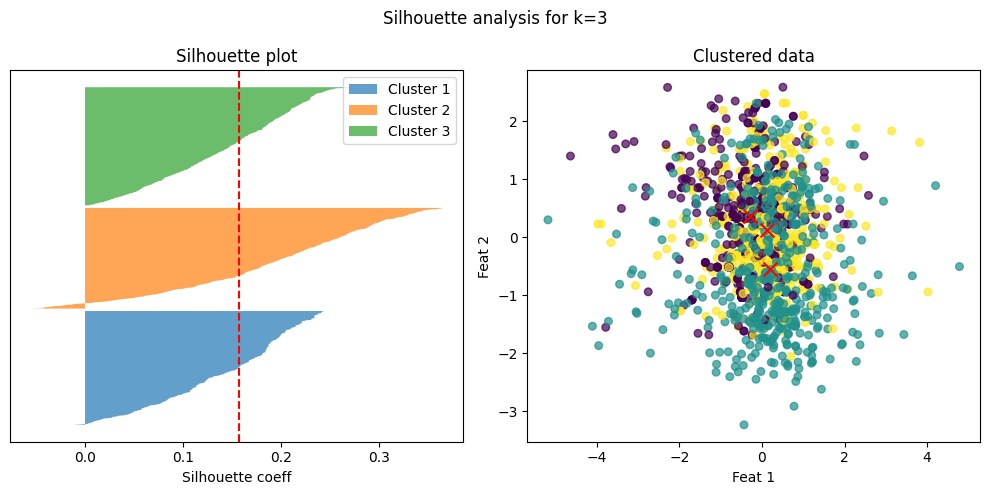

For n_clusters = 4, avg silhouette = 0.143


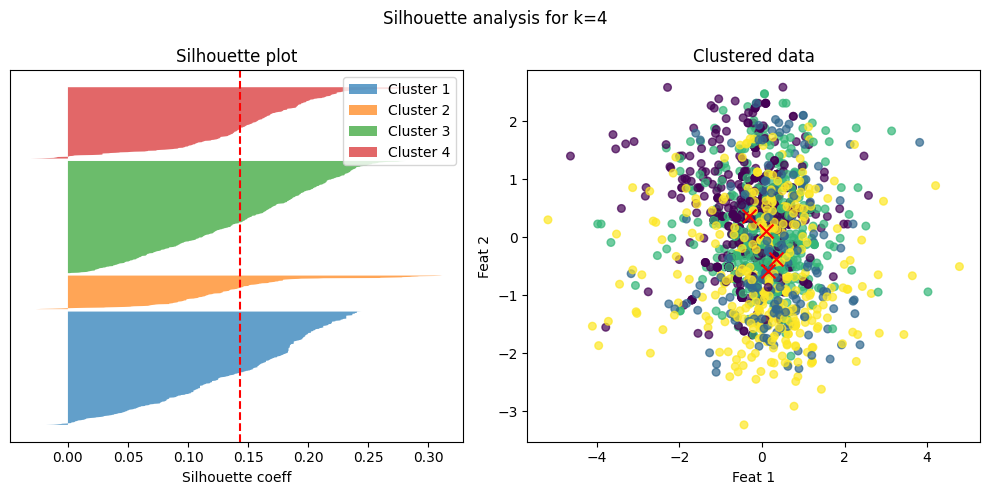

In [30]:
X_proc = preprocessor_clust.fit_transform(df)
min_samples = X_proc.shape[1] + 1
# ─── Cell 1: Silhouette analysis (K-Means) ─────────────────────────────────────
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2, 5):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    kmeans     = KMeans(n_clusters=n_clusters, random_state=42)
    labels_km  = kmeans.fit_predict(X_proc)
    sil_avg    = silhouette_score(X_proc, labels_km)
    print(f"For n_clusters = {n_clusters}, avg silhouette = {sil_avg:.3f}")

    sample_vals = silhouette_samples(X_proc, labels_km)
    y_lower = 10
    for i in range(n_clusters):
        vals_i = np.sort(sample_vals[labels_km == i])
        size_i = vals_i.shape[0]
        y_upper = y_lower + size_i
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, vals_i, alpha=0.7, label=f"Cluster {i+1}"
        )
        y_lower = y_upper + 10

    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set(title="Silhouette plot", xlabel="Silhouette coeff", yticks=[])
    ax1.legend()

    ax2.scatter(X_proc[:,0], X_proc[:,1], c=labels_km,
                s=30, alpha=0.7, cmap="viridis")
    ax2.scatter(kmeans.cluster_centers_[:,0],
                kmeans.cluster_centers_[:,1],
                c="red", s=100, marker="x")
    ax2.set(title="Clustered data", xlabel="Feat 1", ylabel="Feat 2")

    plt.suptitle(f"Silhouette analysis for k={n_clusters}")
    plt.tight_layout()
    plt.show()



### DBSCAN

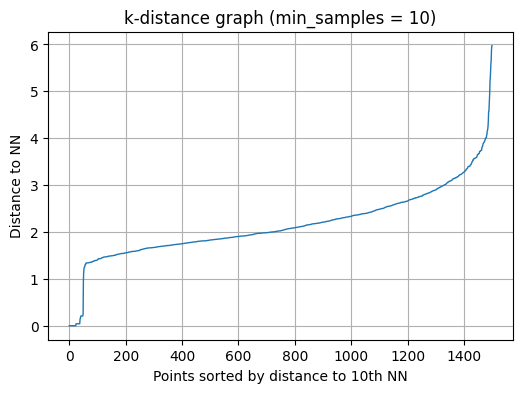

ε candidates (90th, 95th, 97.5th percentiles): [3.083 3.435 3.744]
ε = 3.083 → # clusters = 2
ε = 3.435 → # clusters = 2
ε = 3.744 → # clusters = 2

Running final DBSCAN with ε = 3.435, min_samples = 10
Estimated # clusters: 2
Estimated # noise points: 16


In [31]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS, TSNE

# 1) Preprocess the data
X_proc = preprocessor_clust.fit_transform(df)

# 2) Choose min_samples
min_samples = 10

# 3) k-distance graph to guide ε selection
nbrs       = NearestNeighbors(n_neighbors=min_samples).fit(X_proc)
distances, _ = nbrs.kneighbors(X_proc)
k_dist      = np.sort(distances[:, min_samples - 1])

plt.figure(figsize=(6, 4))
plt.plot(k_dist, lw=1)
plt.title(f"k-distance graph (min_samples = {min_samples})")
plt.xlabel(f"Points sorted by distance to {min_samples}th NN")
plt.ylabel("Distance to NN")
plt.grid(True)
plt.show()

# 4) Compute a few ε candidates from percentiles
eps_candidates = np.percentile(k_dist, [90, 95, 97.5])
print("ε candidates (90th, 95th, 97.5th percentiles):", np.round(eps_candidates, 3))

# 5) Quick scan: cluster count for each ε
for eps in eps_candidates:
    labels_temp = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_proc)
    n_clusters  = len(set(labels_temp)) - (1 if -1 in labels_temp else 0)
    print(f"ε = {eps:.3f} → # clusters = {n_clusters}")

# 6) Pick final ε (e.g. the 95th-percentile) and run DBSCAN
best_eps = eps_candidates[1]
print(f"\nRunning final DBSCAN with ε = {best_eps:.3f}, min_samples = {min_samples}")
db        = DBSCAN(eps=best_eps, min_samples=min_samples).fit(X_proc)
labels_db = db.labels_

# 7) Attach labels to a fresh DataFrame
df_db = df.assign(db_cluster=labels_db)

# 8) Report cluster vs noise counts
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise    = (labels_db == -1).sum()
print(f"Estimated # clusters: {n_clusters}")
print(f"Estimated # noise points: {n_noise}")


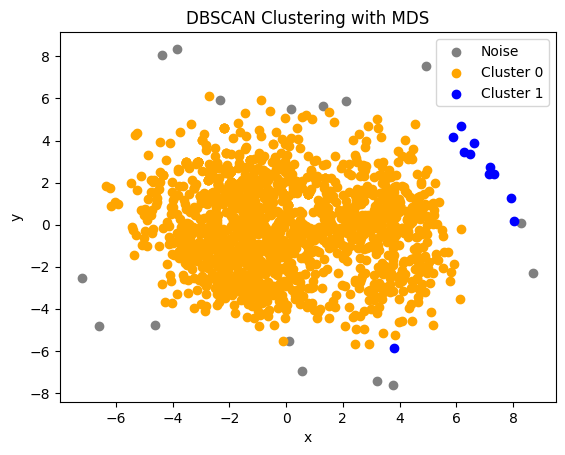

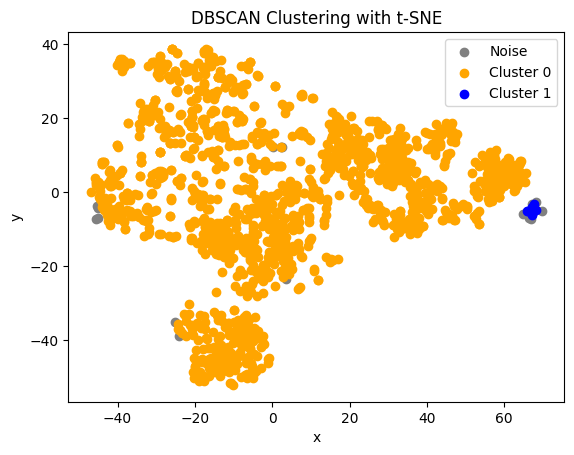

In [32]:
# 9) Visualize with MDS and t-SNE
for name, reducer in [("MDS", MDS(n_components=2, random_state=42)),
                      ("t-SNE", TSNE(n_components=2, random_state=42))]:
    coords = reducer.fit_transform(X_proc)
    clustering_scatterplot(
        coords,
        labels_db,
        centers=None,
        title=f"DBSCAN Clustering with {name}"
    )
    plt.show()

In [33]:
cluster_counts = df_db['db_cluster'].value_counts().sort_index().rename('count')
cluster_means  = df_db.groupby('db_cluster').mean(numeric_only=True)
cluster_summary = pd.concat([cluster_counts, cluster_means], axis=1)

# Display the summary table
cluster_summary


,count,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
db_cluster,,,,,,,,,,,,,,,,
-1,16,23.312500,244349.75000,0.125000,0.450875,0.586842,5.500000,-10.925062,0.750000,0.244619,0.399023,0.276330,0.385950,0.297737,131.220812,2.68750
0,1473,28.620502,209246.98167,0.105227,0.544113,0.597480,5.031908,-8.226684,0.653089,0.075930,0.343423,0.165914,0.193142,0.381406,116.882071,3.91446
1,11,27.272727,226362.00000,0.000000,0.264636,0.190000,5.909091,-15.940909,0.636364,0.041445,0.877091,0.099138,0.145182,0.113364,101.811000,1.00000


## Classification

In [34]:
# ─── Cell 1: Create binary target (leave `popularity` in df for the preprocessor to drop) ───
m = df['popularity'].median()
df['popularity_binary'] = (df['popularity'] > m).astype(int)
# DO NOT drop `popularity` here — `preprocessor_clf` will handle that.


In [35]:
# ─── Cell 2: Train/test split ───────────────────────────────────────────────────────────
from sklearn.model_selection import train_test_split

X = df.drop('popularity_binary', axis=1)
y = df['popularity_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    stratify=y,
    random_state=42
)


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

# 1) Pipeline
pipe_svm = Pipeline([
    ('preproc', preprocessor_clf),
    ('svm',    SVC(probability=True, random_state=42))
])

set_config(display="diagram")
pipe_svm



Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['duration_ms', 'tempo',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'speechiness',
                                                   'acousticness']),
                                                 ('cube',
                                                  Pipeline(steps=[('cuberoot',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scale',
                                                                   StandardScaler(...
                                                  ['time_signature']),
                                                 ('key_norm',
                                                  Pipeline(steps=[('norm11',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000002919322D760>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['key']),
                                                 ('genre_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['track_genre']),
                                                 ('binary', 'passthrough',
                                                  ['explicit', 'mode']),
                                                 ('drop_popularity', 'drop',
                                                  ['popularity'])])),
                ('svm', SVC(probability=True, random_state=42))])

In [37]:
# ─── Cell 4: GridSearch for SVM ────────────────────────────────────────────────────────
param_grid_svm = {
    'svm__C':     [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel':[ 'rbf', 'linear', 'poly']
}

search_svm = GridSearchCV(
    pipe_svm,
    param_grid=param_grid_svm,
    cv=3,
    n_jobs=-1,
    refit=True
)
search_svm.fit(X_train, y_train)

print("Best SVM CV score   =", search_svm.best_score_)
print("Best SVM parameters =", search_svm.best_params_)

SVM_best_model  = search_svm.best_estimator_
SVM_best_params = search_svm.best_params_


Best SVM CV score   = 0.7333333333333334
Best SVM parameters = {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


In [38]:
# ─── Cell 5: Random Forest pipeline + hyperparameter search ───────────────────────────
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipe_rf = Pipeline([
    ('preproc', preprocessor_clf),
    ('rf',      RandomForestClassifier(random_state=42))
])

set_config(display="diagram")
pipe_rf


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['duration_ms', 'tempo',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'speechiness',
                                                   'acousticness']),
                                                 ('cube',
                                                  Pipeline(steps=[('cuberoot',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scale',
                                                                   StandardScaler(...
                                                  ['time_signature']),
                                                 ('key_norm',
                                                  Pipeline(steps=[('norm11',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000002919322D760>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['key']),
                                                 ('genre_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['track_genre']),
                                                 ('binary', 'passthrough',
                                                  ['explicit', 'mode']),
                                                 ('drop_popularity', 'drop',
                                                  ['popularity'])])),
                ('rf', RandomForestClassifier(random_state=42))])

In [39]:
# ─── Cell 6: RandomizedSearch for RF ─────────────────────────────────────────────────
param_dist_rf = {
    'rf__n_estimators':    [50, 100, 150, 200],
    'rf__max_depth':       [10, 20, None],
    'rf__min_samples_split':[2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features':    ['sqrt', 'log2'],
    'rf__bootstrap':       [True, False]
}

search_rf = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist_rf,
    n_iter=100,
    cv=3,
    n_jobs=-1,
    refit=True,
    random_state=42
)
search_rf.fit(X_train, y_train)

print("Best RF CV score   =", search_rf.best_score_)
print("Best RF parameters =", search_rf.best_params_)

RF_best_model  = search_rf.best_estimator_
RF_best_params = search_rf.best_params_


Best RF CV score   = 0.7599999999999999
Best RF parameters = {'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 'log2', 'rf__max_depth': 20, 'rf__bootstrap': False}


In [40]:
# 1) Build pipeline: preprocessing → HistGradientBoosting
pipe_gb = Pipeline([
    ('preproc', preprocessor_clf),
    ('gb',     HistGradientBoostingClassifier(random_state=42))
])

# Visualize pipeline structure
set_config(display="diagram")
pipe_gb


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['duration_ms', 'tempo',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'speechiness',
                                                   'acousticness']),
                                                 ('cube',
                                                  Pipeline(steps=[('cuberoot',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scale',
                                                                   StandardScaler(...
                                                 ('key_norm',
                                                  Pipeline(steps=[('norm11',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000002919322D760>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['key']),
                                                 ('genre_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['track_genre']),
                                                 ('binary', 'passthrough',
                                                  ['explicit', 'mode']),
                                                 ('drop_popularity', 'drop',
                                                  ['popularity'])])),
                ('gb', HistGradientBoostingClassifier(random_state=42))])

In [41]:
# ─── Cell 8: RandomizedSearch for GB ──────────────────────────────────────────────────
param_dist_gb = {
    'gb__learning_rate':   [0.01, 0.1, 0.2],
    'gb__max_iter':        [100, 200, 300],
    'gb__max_depth':       [3, 5, 7],
    'gb__min_samples_leaf':[20, 30, 50]
}

search_gb = RandomizedSearchCV(
    pipe_gb,
    param_distributions=param_dist_gb,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    refit=True,
    random_state=42,
    verbose=2
)
search_gb.fit(X_train, y_train)

print("Best GB CV score   =", search_gb.best_score_)
print("Best GB parameters =", search_gb.best_params_)

GB_best_model  = search_gb.best_estimator_
GB_best_params = search_gb.best_params_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best GB CV score   = 0.7441666666666666
Best GB parameters = {'gb__min_samples_leaf': 20, 'gb__max_iter': 100, 'gb__max_depth': 5, 'gb__learning_rate': 0.01}


In [ ]:
#this too
# pipe = Pipeline([('gb', HistGradientBoostingClassifier(random_state=42))])

In [ ]:
#Broken code, think it can be removed

# param_grid = {
#     'gb__learning_rate': [0.01, 0.1, 0.2],
#     'gb__max_iter': [100, 200, 300],
#     'gb__max_depth': [3, 5, 7],
#     'gb__min_samples_leaf': [20, 30, 50]
# }

# search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=20,
#                             n_jobs=4, cv=3, refit=True, random_state=42, verbose=2)

# search.fit(X_train, y_train)
# print("Best CV score = %0.3f:" % search.best_score_)
# print("Best parameters: ", search.best_params_)

# # store the best params and best model for later use
# gb_best_params = search.best_params_
# gb_best_model = search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 560, in fit
    X, known_categories = self._preprocess_X(X, reset=True)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 277, in _preprocess_X
    X = self._validate_data(X, **check_X_kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 6534, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 414, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 354, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py", line 616, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 238, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 183, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 134, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'dance'

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 560, in fit
    X, known_categories = self._preprocess_X(X, reset=True)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 277, in _preprocess_X
    X = self._validate_data(X, **check_X_kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 6534, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 414, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 354, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py", line 616, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 238, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 183, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 134, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'club'


# Model evaluation
Here we graph model results based on accuracy, precision, recall, F1 score and MAE.
+ SVM is the best performing model in every metric, with a 73.67% accuracy and the best precision at 74.35% and F1 score at 73.29%. It also had the lowest MAE at 0.2633, indicating fewer prediction errors. SVM outperformed Random Forest and Gradient Boosting, making it the best overall model for this task.

+ Gradient boosting is the worst performing with an accuracy of 69%. This model performed the worst in all areas which indicates the model struggled to identify patterns in the data like SVM did.

+ Random forest achieves an accuracy of 71%, so there is still some incorrect predictions, but this could be due to some tracks having very similar values. Overall SVM outperformed it, although random forest had the highest CV score.





Model: Random Forest
  Accuracy : 0.7100
  Precision: 0.7107
  Recall   : 0.7100
  F1 Score : 0.7101
  MAE      : 0.2900

Model: Gradient Boosting
  Accuracy : 0.6933
  Precision: 0.6995
  Recall   : 0.6933
  F1 Score : 0.6882
  MAE      : 0.3067

Model: SVM
  Accuracy : 0.7367
  Precision: 0.7435
  Recall   : 0.7367
  F1 Score : 0.7329
  MAE      : 0.2633


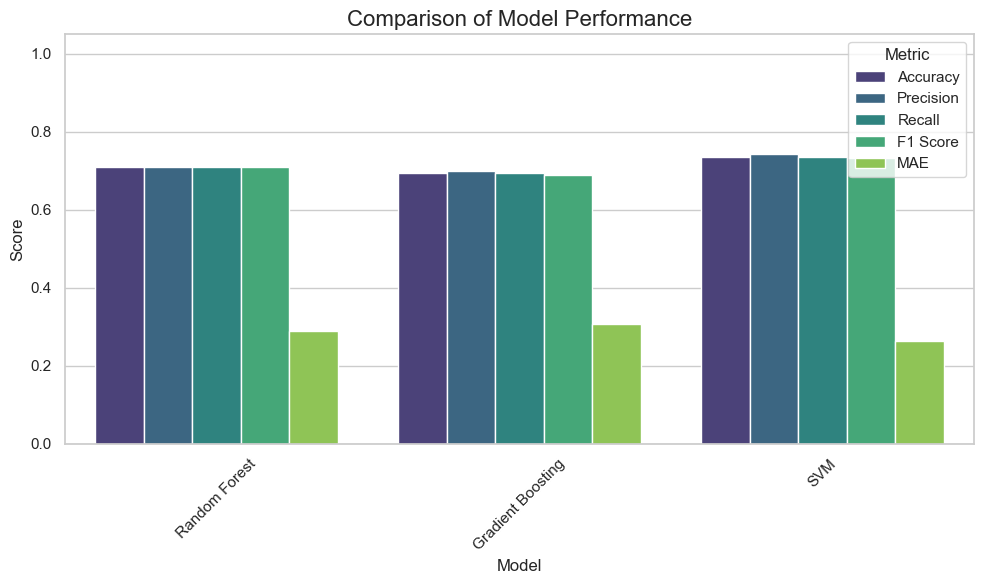

In [ ]:
rf_preds = RF_best_model.predict(X_test)
GB_preds = GB_best_model.predict(X_test)
svm_preds = SVM_best_model.predict(X_test)

# Collect all model predictions
models_predictions = {
    "Random Forest": rf_preds,
    "Gradient Boosting": GB_preds,
    "SVM": svm_preds
}

# Initialisees the results dictionary
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "MAE": []
}

# Calculate metrics for each model
for model_name, preds in models_predictions.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    mae = mean_absolute_error(y_test, preds)

    results["Model"].append(model_name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)
    results["MAE"].append(mae)
    
    print(f"\nModel: {model_name}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print(f"  MAE      : {mae:.4f}")

results_df = pd.DataFrame(results)

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

#Creating bar charts to for each metric in each model.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="viridis")

plt.title("Comparison of Model Performance", fontsize=16)
plt.ylim(0, 1.05)
plt.legend(title="Metric")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()